In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('Notebooks/datasetScikitLearn.csv')

In [4]:
df_dsa.shape

(500, 2)

In [5]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [6]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória - Resumo Estatístico

In [8]:
# Verifica se há valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [9]:
# Correlação
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [10]:
# Resumo estatístico do dataset 
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
# Resumo estatístico da variável preditora
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

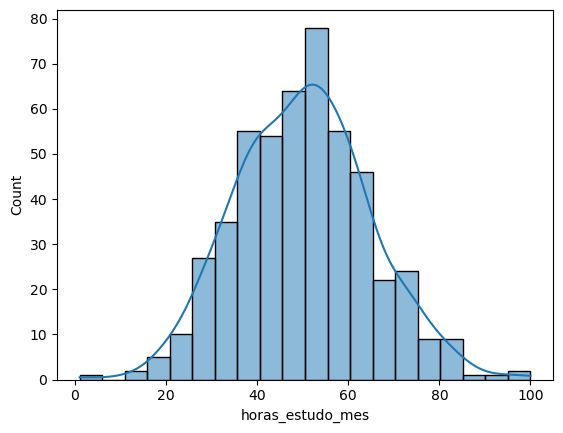

In [12]:
# Histograma da variável preditora
sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde = True)

## Preparação dos Dados

In [13]:
# Prepara a variável de entrada X
# o scikit-learn recebe como parametro X somente ARRAYS NUMPY, entao temos que transformar nossa variavel em array
X = np.array(df_dsa['horas_estudo_mes'])

In [14]:
# Ajusta o shape de X conforme solicitar o scikit-learn
X = X.reshape(-1, 1)

In [17]:
X

array([[ 57.],
       [ 48.],
       [ 60.],
       [ 73.],
       [ 46.],
       [ 46.],
       [ 74.],
       [ 62.],
       [ 43.],
       [ 58.],
       [ 43.],
       [ 43.],
       [ 54.],
       [ 21.],
       [ 24.],
       [ 42.],
       [ 35.],
       [ 55.],
       [ 36.],
       [ 29.],
       [ 72.],
       [ 47.],
       [ 51.],
       [ 29.],
       [ 42.],
       [ 52.],
       [ 33.],
       [ 56.],
       [ 41.],
       [ 46.],
       [ 41.],
       [ 78.],
       [ 50.],
       [ 34.],
       [ 62.],
       [ 32.],
       [ 53.],
       [ 21.],
       [ 30.],
       [ 53.],
       [ 61.],
       [ 53.],
       [ 48.],
       [ 45.],
       [ 28.],
       [ 39.],
       [ 43.],
       [ 66.],
       [ 55.],
       [ 24.],
       [ 55.],
       [ 44.],
       [ 40.],
       [ 59.],
       [ 65.],
       [ 64.],
       [ 37.],
       [ 45.],
       [ 55.],
       [ 65.],
       [ 43.],
       [ 47.],
       [ 33.],
       [ 32.],
       [ 62.],
       [ 70.],
       [ 4

In [18]:
# Prepara a variável alvo
y = df_dsa['salario']

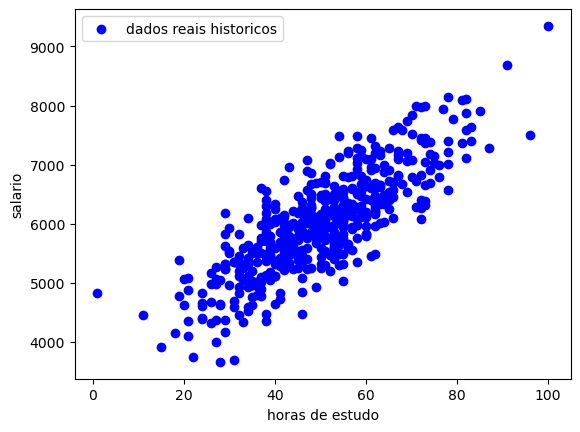

In [19]:
# grafico de dispersao entre x e y para entender as variaveis

plt.scatter(X,y, color = "blue", label = "dados reais historicos")
plt.xlabel("horas de estudo")
plt.ylabel("salario")
plt.legend()
plt.show()

In [20]:
# dividir dados em treinamento e teste
# os dados sao separados entre treino e teste, conforme as variaveis que separamos do dataset
# onde x é a variavel independente e y é a variavel dependente
# o train_test_split faz essa divisao, o test_size indica que 20% do dataset é separado para base teste

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [21]:
X_treino.shape

(400, 1)

In [22]:
X_teste.shape

(100, 1)

In [23]:
y_treino.shape

(400,)

In [24]:
y_teste.shape

(100,)

Observe que a variavel x é uma matriz, enquanto a variavel y é um vetor, por isso que nós alteramos o shape da variavel x, pois o train_test_split solicita que a variavel X seja uma matriz

## Modelagem Preditiva (Machine Learning)

In [25]:
# cria o modelo de regressao linear simples
# o modelo é criado instanciando um objeto da classe LinearRegression()

modelo = LinearRegression()

In [26]:
# treinando o modelo, treinamos o modelo com o método fit do objeto criado a partir da classe LinearRegression()
# aqui treinamos com os dados de 80% do dataset

modelo.fit(X_treino,y_treino)

LinearRegression()

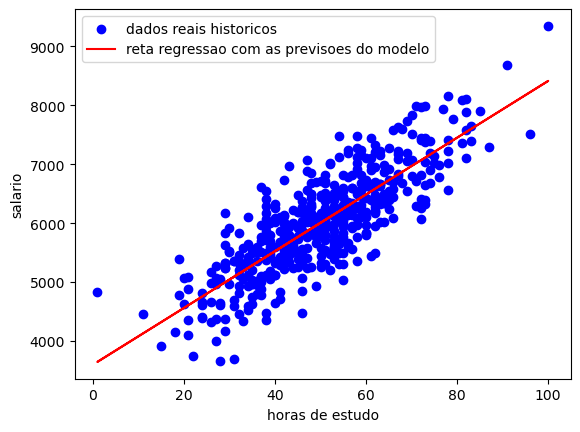

In [29]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento

plt.scatter(X,y,color = "blue", label = "dados reais historicos")
plt.plot(X,modelo.predict(X), color = "red", label = "reta regressao com as previsoes do modelo")
plt.xlabel("horas de estudo")
plt.ylabel("salario")
plt.legend()
plt.show()

In [30]:
# avalia o modelo nos dados de teste
# atraves do metodo score com os dados de teste, podemos testar a acuracia do nosso modelo

score = modelo.score(X_teste, y_teste)
print(f"coeficiente r2: {score:.2f}")

coeficiente r2: 0.59


os parametro w0 e w1 são os parametros que explicam a regressao que foi feita a partir do treino do modelo. eses parametros são utilizados na equação que define a reta de regressao, considerando o dado de entrada X, calcula o resultado y da formula. São esses dados que ficam gravados para que possamos realizar o deploy do modelo, os dados ficam salvos para serem utilizados quando
quisermos fazer uma predicao do modelo com dados de entrada desconhecidos

In [31]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727527

In [32]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

Algoritmo de Regressão Linear:

![DSA](Notebooks/reglinear.png)

## Deploy do Modelo

Usaremos o modelo para prever o salário com base nas horas de estudo.

O deploy é a aplicacao do modelo com base em dados novos de entrada. A funcao predict aplica a formula da regressao com os parametros que foram descobertos pelo modelo, conforme explicado acima.

Com os parametros salvos apos o treinamento do modelo, podemos utilizar o modelo na nossa maquina, ou podemos subir o modelo em um servidor remoto, e disponibilizar uma api que se conecta ao modelo fazendo as predicoes

In [34]:
# Define um novo valor para horas de estudo

horas_estudo_novo = np.array([[48]])

# fazendo a previsao com o modelo

salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [37]:
# utilizando os parametros w0 e w1 manual para mostrar que sera igual ao fazer com o metodo predict

salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


In [38]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[65]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [41]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]
